In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import Imputer
from sklearn.cluster import DBSCAN
sns.set()

warnings.filterwarnings('ignore')

%matplotlib inline
color = sns.color_palette()

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
# Отобразить head таблицы.
diabetic = pd.read_excel('diabetic_data.xlsx')
diabetic.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41.0,0,1.0,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59.0,0,18.0,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11.0,5,13.0,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44.0,1,16.0,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51.0,0,8.0,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Отобразить tail таблицы.
diabetic.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51.0,0,16.0,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33.0,3,18.0,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53.0,0,9.0,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,45.0,2,21.0,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),NaN,1,1,7,6,NaN,NaN,13.0,3,3.0,0,0,0,530,530,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [5]:
# Переименовать несколько колонок в таблице.
# Отобразить названия всех колонок.
print(diabetic.columns.values)

diabetic = diabetic.rename(columns={'encounter_id': 'ID', 'number_diagnoses': 'n_diag', 'number_inpatient': 'num_inpatient'})
print(diabetic.columns.values)

['encounter_id' 'patient_nbr' 'race' 'gender' 'age' 'weight'
 'admission_type_id' 'discharge_disposition_id' 'admission_source_id'
 'time_in_hospital' 'payer_code' 'medical_specialty' 'num_lab_procedures'
 'num_procedures' 'num_medications' 'number_outpatient' 'number_emergency'
 'number_inpatient' 'diag_1' 'diag_2' 'diag_3' 'number_diagnoses'
 'max_glu_serum' 'A1Cresult' 'metformin' 'repaglinide' 'nateglinide'
 'chlorpropamide' 'glimepiride' 'acetohexamide' 'glipizide' 'glyburide'
 'tolbutamide' 'pioglitazone' 'rosiglitazone' 'acarbose' 'miglitol'
 'troglitazone' 'tolazamide' 'examide' 'citoglipton' 'insulin'
 'glyburide-metformin' 'glipizide-metformin' 'glimepiride-pioglitazone'
 'metformin-rosiglitazone' 'metformin-pioglitazone' 'change' 'diabetesMed'
 'readmitted']
['ID' 'patient_nbr' 'race' 'gender' 'age' 'weight' 'admission_type_id'
 'discharge_disposition_id' 'admission_source_id' 'time_in_hospital'
 'payer_code' 'medical_specialty' 'num_lab_procedures' 'num_procedures'
 'num_me

In [7]:
# Посчитать к-во столбцов и записей в таблице.
shape = diabetic.shape

# n - columns
print('n - columns: ', shape[1])

# n - rows
print('n - rows: ', shape[0])

n - columns:  50
n - rows:  101766


In [8]:
# Отобразить информацию о таблице, формат данных, объем памяти занятой таблицей.
diabetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
ID                          101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101723 non-null float64
num_procedures              101766 non-null int64
num_medications             101750 non-null float64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
num_inpatient               101766

In [9]:
# Базовые статистические показатели numeric полей в таблице.
diabetic.describe()

,ID,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,num_inpatient,n_diag
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101723.000000,101766.000000,101750.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.094207,1.339730,16.022418,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.675108,1.705807,8.127894,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [10]:
# К-во записей по одной из категориальных переменных.
race = diabetic['race']
race.shape

(101766,)

In [11]:
# К-во уникальных значений во всех категориальных переменных
cols = diabetic.columns
num_cols = diabetic._get_numeric_data().columns
print(num_cols)

# Get categorical
categorical = list(set(cols) - set(num_cols))
print(categorical)

# Get unique-column from each column 
unique = np.array([])
for column in categorical:
    unique = np.append(unique, diabetic[column].unique())

# Chech array of all unique-column vals from each column
print(unique.shape)
print(unique)

# Get unique vals from array of unique-column vals
unique = pd.Series(unique).unique()
print('\nUnique vals: ', unique.shape)

Index(['ID', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'num_inpatient', 'n_diag'],
      dtype='object')
['tolbutamide', 'metformin', 'readmitted', 'nateglinide', 'glipizide', 'gender', 'payer_code', 'insulin', 'glyburide', 'citoglipton', 'glimepiride', 'pioglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'diag_3', 'medical_specialty', 'miglitol', 'glyburide-metformin', 'diag_2', 'metformin-rosiglitazone', 'acetohexamide', 'rosiglitazone', 'max_glu_serum', 'race', 'diabetesMed', 'metformin-pioglitazone', 'chlorpropamide', 'tolazamide', 'A1Cresult', 'diag_1', 'weight', 'repaglinide', 'troglitazone', 'acarbose', 'change', 'examide', 'age']
(2462,)
['No' 'Steady' 'No' ... '[70-80)' '[80-90)' '[90-100)']

Unique vals:  (1046,)


In [12]:
# Посчитать к-во пропущенных значений в таблице по каждой из колонок.

missing_values = diabetic.isnull().sum().sort_values(ascending=False)
percent_data = (diabetic.isnull().sum() / diabetic.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_values, percent_data], axis=1, keys=['Total', 'Percent'])
print('Missing data:\n', missing_data)

Missing data:
                           Total   Percent
weight                    98569  0.968585
medical_specialty         49949  0.490822
payer_code                40256  0.395574
race                       2273  0.022336
diag_3                     1423  0.013983
diag_2                      358  0.003518
num_lab_procedures           43  0.000423
diag_1                       21  0.000206
num_medications              16  0.000157
max_glu_serum                 0  0.000000
n_diag                        0  0.000000
num_inpatient                 0  0.000000
number_emergency              0  0.000000
number_outpatient             0  0.000000
readmitted                    0  0.000000
num_procedures                0  0.000000
diabetesMed                   0  0.000000
time_in_hospital              0  0.000000
admission_source_id           0  0.000000
discharge_disposition_id      0  0.000000
admission_type_id             0  0.000000
age                           0  0.000000
gender             

In [14]:
# Заменить в одной из категориальных колонок на все большие и маленькие символы.
diabetic['gender'] = diabetic.gender.str.lower()
diabetic.gender

0         female
1         female
2         female
3           male
4           male
5           male
6           male
7           male
8         female
9         female
10        female
11          male
12        female
13          male
14        female
15          male
16          male
17        female
18          male
19          male
20        female
21          male
22        female
23        female
24        female
25        female
26          male
27        female
28          male
29        female
30        female
31          male
32        female
33          male
34        female
35        female
36        female
37        female
38          male
39          male
40        female
41          male
42        female
43          male
44        female
45        female
46        female
47          male
48          male
49          male
           ...  
101716      male
101717      male
101718    female
101719      male
101720      male
101721    female
101722    female
101723      ma

In [15]:
# Заменить пропущенные значения в numeric колонках с использованием SciKit Imputer
c = diabetic.columns
indexes = missing_data[missing_data['Total'] > 0].index.tolist()
print(indexes)

# Find numerical missing vals
missing_num_cols = []
for index in indexes:
    result = index in num_cols
    if result:
        missing_num_cols.append(index)
    else:
        continue
        
print(missing_num_cols)
        
for column in missing_num_cols:
    print(diabetic[column].isnull().sum(), diabetic[column].shape)
    imputer = Imputer(missing_values=np.nan, strategy='median', axis=1)
    diabetic[column] = imputer.fit_transform([diabetic[column]]).ravel()
    print(diabetic[column].isnull().sum(), diabetic[column].shape)

['weight', 'medical_specialty', 'payer_code', 'race', 'diag_3', 'diag_2', 'num_lab_procedures', 'diag_1', 'num_medications']
['num_lab_procedures', 'num_medications']
43 (101766,)
0 (101766,)
16 (101766,)
0 (101766,)


In [16]:
# Удалить дубликаты
diabetic = diabetic.drop_duplicates()
print(diabetic.shape)

(101766, 50)


In [18]:
# Поменять формат данных в нескольких колонках таблицы.
diabetic.num_procedures = diabetic.num_procedures.astype('float64')
diabetic.number_outpatient  = diabetic.number_outpatient.astype('float64')
diabetic.admission_type_id  = diabetic.admission_type_id.astype('str')
diabetic.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 50 columns):
ID                          101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null float64
num_procedures              101766 non-null float64
num_medications             101766 non-null float64
number_outpatient           101766 non-null float64
number_emergency            101766 non-null int64
num_inpatient               1

In [19]:
# Провести фильтрацию по двум numeric колонкам одновременно.
males = diabetic[(diabetic.time_in_hospital > 10) & (diabetic.num_lab_procedures < 10)]
males

,ID,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,num_inpatient,diag_1,diag_2,diag_3,n_diag,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
251,2922522,109286217,Caucasian,female,[70-80),NaN,3,6,4,11,NaN,Cardiology,2.0,2.0,12.0,0.0,0,1,38,599,250.01,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
4251,24344844,5810634,Caucasian,female,[60-70),NaN,1,6,4,12,NaN,InternalMedicine,4.0,0.0,16.0,0.0,0,0,434,564,V58,9,None,None,Down,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO
4854,26387616,108170478,AfricanAmerican,female,[60-70),NaN,3,1,1,11,NaN,NaN,9.0,0.0,6.0,0.0,0,1,799,276,428,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
7196,34517904,179667,Caucasian,male,[80-90),NaN,3,11,4,12,NaN,NaN,2.0,0.0,13.0,0.0,0,1,585,428,425,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
7584,35695698,61596900,Caucasian,male,[80-90),NaN,6,6,4,11,NaN,InternalMedicine,1.0,2.0,8.0,0.0,0,1,331,V57,V57,6,None,None,Steady,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,>30
9851,42346914,292419,Caucasian,male,[50-60),NaN,1,1,7,13,NaN,Emergency/Trauma,9.0,0.0,13.0,0.0,0,5,295,780,250,4,None,None,No,No,No,No,No,No,Up,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,>30
10586,44711592,23396985,Caucasian,female,[30-40),NaN,5,1,17,13,NaN,Psychiatry,7.0,0.0,12.0,1.0,0,0,296,309,301,5,None,None,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
11917,48901866,25976070,Caucasian,female,[90-100),NaN,2,3,17,11,NaN,Surgery-General,9.0,2.0,17.0,0.0,0,0,250.81,707,276,8,>200,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
15623,59733792,107491626,Caucasian,male,[60-70),NaN,2,11,1,13,NaN,NaN,1.0,0.0,6.0,0.0,0,3,429,428,403,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
16879,62774256,86679072,Caucasian,female,[80-90),NaN,1,22,7,14,NaN,Family/GeneralPractice,7.0,0.0,8.0,0.0,0,1,920,428,294,5,None,Norm,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO


In [20]:
# Добавить расчетное поле.
diabetic['num_all_procedures'] = diabetic['num_lab_procedures'] +  diabetic['num_procedures']
diabetic.num_all_procedures.head()

0    41.0
1    59.0
2    16.0
3    45.0
4    51.0
Name: num_all_procedures, dtype: float64

In [21]:
# Поменять порядок колонок в вашей таблице.
columns = diabetic.columns
diabetic = diabetic[np.flip(columns.values, axis=0)]
diabetic.head()

,num_all_procedures,readmitted,diabetesMed,change,metformin-pioglitazone,metformin-rosiglitazone,glimepiride-pioglitazone,glipizide-metformin,glyburide-metformin,insulin,citoglipton,examide,tolazamide,troglitazone,miglitol,acarbose,rosiglitazone,pioglitazone,tolbutamide,glyburide,glipizide,acetohexamide,glimepiride,chlorpropamide,nateglinide,repaglinide,metformin,A1Cresult,max_glu_serum,n_diag,diag_3,diag_2,diag_1,num_inpatient,number_emergency,number_outpatient,num_medications,num_procedures,num_lab_procedures,medical_specialty,payer_code,time_in_hospital,admission_source_id,discharge_disposition_id,admission_type_id,weight,age,gender,race,patient_nbr,ID
0,41.0,NO,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,1,NaN,NaN,250.83,0,0,0.0,1.0,0.0,41.0,Pediatrics-Endocrinology,NaN,1,1,25,6,NaN,[0-10),female,Caucasian,8222157,2278392
1,59.0,>30,Yes,Ch,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,9,255,250.01,276,0,0,0.0,18.0,0.0,59.0,NaN,NaN,3,7,1,1,NaN,[10-20),female,Caucasian,55629189,149190
2,16.0,NO,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,None,None,6,V27,250,648,1,0,2.0,13.0,5.0,11.0,NaN,NaN,2,7,1,1,NaN,[20-30),female,AfricanAmerican,86047875,64410
3,45.0,NO,Yes,Ch,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,7,403,250.43,8,0,0,0.0,16.0,1.0,44.0,NaN,NaN,2,7,1,1,NaN,[30-40),male,Caucasian,82442376,500364
4,51.0,NO,Yes,Ch,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,None,None,5,250,157,197,0,0,0.0,8.0,0.0,51.0,NaN,NaN,1,7,1,1,NaN,[40-50),male,Caucasian,42519267,16680


In [23]:
# Подготовить пример двух агрегированных таблиц.
# Таблица 1
grouped = diabetic.groupby(['race', 'gender',], as_index=False)['num_procedures'].count().head()
grouped.head()


,race,gender,num_procedures
0,AfricanAmerican,female,11728
1,AfricanAmerican,male,7482
2,Asian,female,318
3,Asian,male,323
4,Caucasian,female,39689


In [24]:
# Подготовить пример двух агрегированных таблиц.
# Таблица 2
table = diabetic.agg(['min', 'max'])
table

,num_all_procedures,readmitted,diabetesMed,change,metformin-pioglitazone,metformin-rosiglitazone,glimepiride-pioglitazone,glipizide-metformin,glyburide-metformin,insulin,citoglipton,examide,tolazamide,troglitazone,miglitol,acarbose,rosiglitazone,pioglitazone,tolbutamide,glyburide,glipizide,acetohexamide,glimepiride,chlorpropamide,nateglinide,repaglinide,metformin,A1Cresult,max_glu_serum,n_diag,num_inpatient,number_emergency,number_outpatient,num_medications,num_procedures,num_lab_procedures,time_in_hospital,admission_source_id,discharge_disposition_id,admission_type_id,age,gender,patient_nbr,ID
min,1.0,<30,No,Ch,No,No,No,No,Down,Down,No,No,No,No,Down,Down,Down,Down,No,Down,Down,No,Down,Down,Down,Down,Down,>7,>200,1,0,0,0.0,1.0,0.0,1.0,1,1,1,1,[0-10),female,135,12522
max,135.0,NO,Yes,No,Steady,Steady,Steady,Steady,Up,Up,No,No,Up,Steady,Up,Up,Up,Up,Steady,Up,Up,Steady,Up,Up,Up,Up,Up,Norm,Norm,16,21,76,42.0,81.0,6.0,132.0,14,25,28,8,[90-100),unknown/invalid,189502619,443867222


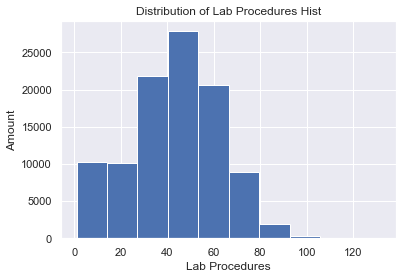

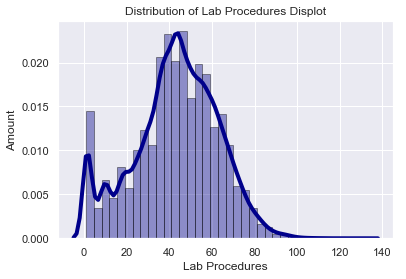

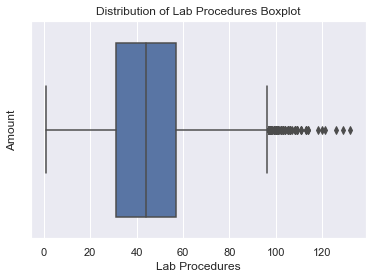

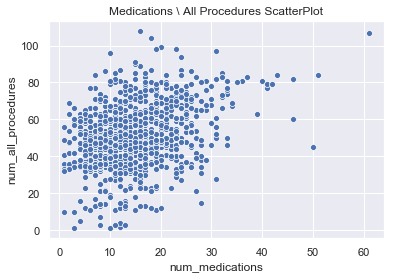

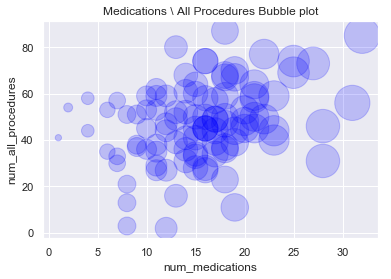

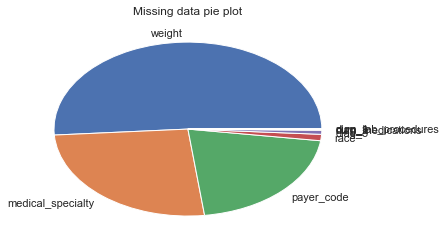

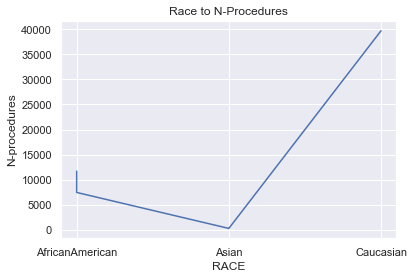

In [25]:
# Подготовить графики следующих типов - HISTOGRAM, DENSITY, BOXPLOT, Scatterplot, Bubble plot, Doughnut plot,Line plot

# HISTOGRAM
plt.hist(diabetic.num_lab_procedures)
plt.xlabel('Lab Procedures')
plt.ylabel('Amount')
plt.title('Distribution of Lab Procedures Hist')
plt.show()

# DENSITY
sns.distplot(diabetic.num_lab_procedures, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel('Lab Procedures')
plt.ylabel('Amount')
plt.title('Distribution of Lab Procedures Displot')
plt.show()

# BOXPLOT
sns.boxplot(diabetic.num_lab_procedures)
plt.xlabel('Lab Procedures')
plt.ylabel('Amount')
plt.title('Distribution of Lab Procedures Boxplot')
plt.show()

# Scatterplot
sns.scatterplot(diabetic.num_medications[0:1000], diabetic.num_all_procedures[0:1000])
plt.xlabel('num_medications')
plt.ylabel('num_all_procedures')
plt.title('Medications \ All Procedures ScatterPlot')
plt.show()

# Bubble plot
plt.scatter(diabetic.num_medications[0:100], diabetic.num_all_procedures[0:100], 
            s=diabetic.num_medications[0:100] * 40, c="blue", alpha=0.2, linewidth=1)
plt.xlabel('num_medications')
plt.ylabel('num_all_procedures')
plt.title('Medications \ All Procedures Bubble plot')
plt.show()

# Doughnut plot
missing = missing_data[missing_data['Total'] > 0]
plt.pie(missing.values[:, 0], labels=missing.index.values.tolist())
plt.title('Missing data pie plot')
plt.show()

# Line plot
plt.plot(grouped.race, grouped.num_procedures)
plt.xlabel('RACE')
plt.ylabel('N-procedures')
plt.title('Race to N-Procedures')
plt.show()


In [26]:
# Загрузить второй файл и обледенить его с первым
ad_map = pd.read_csv('admissions_mapping.csv', encoding='ISO-8859-1')
print(ad_map.head())

# Merge two dataset into one
diabetic.admission_type_id  = diabetic.admission_type_id.astype('float64')
united = diabetic.merge(ad_map, on=['admission_type_id'], how='left')
united.head()

   admission_type_id admission_type_description
0                  1                  Emergency
1                  2                     Urgent
2                  3                   Elective
3                  4                    Newborn
4                  5              Not Available


,num_all_procedures,readmitted,diabetesMed,change,metformin-pioglitazone,metformin-rosiglitazone,glimepiride-pioglitazone,glipizide-metformin,glyburide-metformin,insulin,citoglipton,examide,tolazamide,troglitazone,miglitol,acarbose,rosiglitazone,pioglitazone,tolbutamide,glyburide,glipizide,acetohexamide,glimepiride,chlorpropamide,nateglinide,repaglinide,metformin,A1Cresult,max_glu_serum,n_diag,diag_3,diag_2,diag_1,num_inpatient,number_emergency,number_outpatient,num_medications,num_procedures,num_lab_procedures,medical_specialty,payer_code,time_in_hospital,admission_source_id,discharge_disposition_id,admission_type_id,weight,age,gender,race,patient_nbr,ID,admission_type_description
0,41.0,NO,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,1,NaN,NaN,250.83,0,0,0.0,1.0,0.0,41.0,Pediatrics-Endocrinology,NaN,1,1,25,6.0,NaN,[0-10),female,Caucasian,8222157,2278392,NaN
1,59.0,>30,Yes,Ch,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,9,255,250.01,276,0,0,0.0,18.0,0.0,59.0,NaN,NaN,3,7,1,1.0,NaN,[10-20),female,Caucasian,55629189,149190,Emergency
2,16.0,NO,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,None,None,6,V27,250,648,1,0,2.0,13.0,5.0,11.0,NaN,NaN,2,7,1,1.0,NaN,[20-30),female,AfricanAmerican,86047875,64410,Emergency
3,45.0,NO,Yes,Ch,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,7,403,250.43,8,0,0,0.0,16.0,1.0,44.0,NaN,NaN,2,7,1,1.0,NaN,[30-40),male,Caucasian,82442376,500364,Emergency
4,51.0,NO,Yes,Ch,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,None,None,5,250,157,197,0,0,0.0,8.0,0.0,51.0,NaN,NaN,1,7,1,1.0,NaN,[40-50),male,Caucasian,42519267,16680,Emergency


In [27]:
# Подготовить Scaling одной из переменных в выбранном вами диапазоне, 
# подготовить нормализацию одного из одной из переменных.
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize

# MinMax scaling || Adecvate normalization
array = np.asarray(united.num_all_procedures)
array = np.reshape(array, (-1, 1))
scaler = MinMaxScaler()
min_max = scaler.fit_transform(array)
print('MinMax', min_max)

# StandardScaler
array = np.asarray(united.num_all_procedures)
array = np.reshape(array, (-1, 1))
scaler = StandardScaler()
standrt = scaler.fit_transform(array)
print('\nRS', standrt)

# normalize from sklearn
array = np.asarray(united.num_all_procedures)
array = np.reshape(array, (-1, 1))
scaler = normalize(array)
print('\nN', scaler)

MinMax [[0.29850746]
 [0.43283582]
 [0.1119403 ]
 ...
 [0.3880597 ]
 [0.34328358]
 [0.1119403 ]]

RS [[-0.17307213]
 [ 0.73403566]
 [-1.43294405]
 ...
 [ 0.43166639]
 [ 0.12929713]
 [-1.43294405]]

N [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [40]:
# Найти и заменить выбросы по методу - 3 Сигм, c использованием DBScan Clustering.
u = united.copy()
num_cols = u._get_numeric_data().columns
print(num_cols)

# ####### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# ####### !!!! ВНИМАНИЕ -> ЗАПУСКАТЬ код с фул датасетом на свой страх и риск ->
# ####### !!!! -> сильно грузит ЦП -> ипользывать батчи с приемлемым размером
# ####### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

u = u[0:100]

for column in num_cols:
    outlier_detection = DBSCAN(eps=3, metric="euclidean", min_samples=3)
    array = np.reshape(u[column].values, [-1, 1])
    print(array)
    clusters = outlier_detection.fit_predict(array)
    print(clusters)
    non_zero = np.nonzero(clusters)
    print(non_zero)
    array[non_zero] = u[column].median()
    print(array)
    u[column] = array
    
u

# united = u.copy()

Index(['num_all_procedures', 'n_diag', 'num_inpatient', 'number_emergency',
       'number_outpatient', 'num_medications', 'num_procedures',
       'num_lab_procedures', 'time_in_hospital', 'admission_source_id',
       'discharge_disposition_id', 'admission_type_id', 'patient_nbr', 'ID'],
      dtype='object')
[[41.]
 [59.]
 [16.]
 [45.]
 [51.]
 [50.]
 [45.]
 [44.]
 [46.]
 [36.]
 [49.]
 [62.]
 [60.]
 [56.]
 [54.]
 [80.]
 [49.]
 [29.]
 [40.]
 [44.]
 [67.]
 [38.]
 [47.]
 [44.]
 [23.]
 [33.]
 [67.]
 [27.]
 [53.]
 [52.]
 [87.]
 [53.]
 [27.]
 [37.]
 [48.]
 [41.]
 [34.]
 [33.]
 [49.]
 [45.]
 [28.]
 [38.]
 [50.]
 [59.]
 [73.]
 [13.]
 [28.]
 [ 2.]
 [70.]
 [69.]
 [41.]
 [49.]
 [57.]
 [53.]
 [58.]
 [61.]
 [39.]
 [37.]
 [59.]
 [ 3.]
 [50.]
 [45.]
 [64.]
 [44.]
 [45.]
 [47.]
 [44.]
 [45.]
 [35.]
 [57.]
 [77.]
 [85.]
 [31.]
 [31.]
 [34.]
 [51.]
 [59.]
 [58.]
 [36.]
 [45.]
 [30.]
 [52.]
 [58.]
 [59.]
 [68.]
 [39.]
 [74.]
 [11.]
 [74.]
 [39.]
 [36.]
 [50.]
 [27.]
 [35.]
 [68.]
 [21.]
 [64.]
 [59.]
 

,num_all_procedures,readmitted,diabetesMed,change,metformin-pioglitazone,metformin-rosiglitazone,glimepiride-pioglitazone,glipizide-metformin,glyburide-metformin,insulin,citoglipton,examide,tolazamide,troglitazone,miglitol,acarbose,rosiglitazone,pioglitazone,tolbutamide,glyburide,glipizide,acetohexamide,glimepiride,chlorpropamide,nateglinide,repaglinide,metformin,A1Cresult,max_glu_serum,n_diag,diag_3,diag_2,diag_1,num_inpatient,number_emergency,number_outpatient,num_medications,num_procedures,num_lab_procedures,medical_specialty,payer_code,time_in_hospital,admission_source_id,discharge_disposition_id,admission_type_id,weight,age,gender,race,patient_nbr,ID,admission_type_description
0,41.0,NO,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,1,NaN,NaN,250.83,0,0,0.0,1.0,0.0,41.0,Pediatrics-Endocrinology,NaN,1,1,1,6.0,NaN,[0-10),female,Caucasian,76794214,567117,NaN
1,59.0,>30,Yes,Ch,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,9,255,250.01,276,0,0,0.0,18.0,0.0,59.0,NaN,NaN,3,7,1,1.0,NaN,[10-20),female,Caucasian,76794214,567117,Emergency
2,47.0,NO,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,None,None,6,V27,250,648,1,0,2.0,13.0,5.0,44.0,NaN,NaN,2,7,1,1.0,NaN,[20-30),female,AfricanAmerican,76794214,567117,Emergency
3,45.0,NO,Yes,Ch,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,7,403,250.43,8,0,0,0.0,16.0,1.0,44.0,NaN,NaN,2,7,1,1.0,NaN,[30-40),male,Caucasian,76794214,567117,Emergency
4,51.0,NO,Yes,Ch,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,None,None,5,250,157,197,0,0,0.0,8.0,0.0,51.0,NaN,NaN,1,7,1,1.0,NaN,[40-50),male,Caucasian,76794214,567117,Emergency
5,50.0,>30,Yes,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,9,250,411,414,0,0,0.0,16.0,6.0,44.0,NaN,NaN,3,2,1,2.0,NaN,[50-60),male,Caucasian,76794214,567117,Urgent
6,45.0,NO,Yes,Ch,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,Steady,None,None,7,V45,411,414,0,0,0.0,21.0,1.0,44.0,NaN,NaN,4,2,1,3.0,NaN,[60-70),male,Caucasian,76794214,567117,Elective
7,44.0,>30,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,None,None,8,250,492,428,0,0,0.0,12.0,0.0,44.0,NaN,NaN,5,7,1,1.0,NaN,[70-80),male,Caucasian,76794214,567117,Emergency
8,46.0,NO,Yes,Ch,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,None,None,8,38,427,398,0,0,0.0,28.0,2.0,44.0,NaN,NaN,13,4,1,2.0,NaN,[80-90),female,Caucasian,76794214,567117,Urgent
9,36.0,NO,Yes,Ch,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,None,None,8,486,198,434,0,0,0.0,18.0,3.0,33.0,InternalMedicine,NaN,12,4,3,3.0,NaN,[90-100),female,Caucasian,76794214,567117,Elective


In [47]:
# Рандомно выбрать несколько записей из таблицы
some_samples = united.sample(n=10)
some_samples

,num_all_procedures,readmitted,diabetesMed,change,metformin-pioglitazone,metformin-rosiglitazone,glimepiride-pioglitazone,glipizide-metformin,glyburide-metformin,insulin,citoglipton,examide,tolazamide,troglitazone,miglitol,acarbose,rosiglitazone,pioglitazone,tolbutamide,glyburide,glipizide,acetohexamide,glimepiride,chlorpropamide,nateglinide,repaglinide,metformin,A1Cresult,max_glu_serum,n_diag,diag_3,diag_2,diag_1,num_inpatient,number_emergency,number_outpatient,num_medications,num_procedures,num_lab_procedures,medical_specialty,payer_code,time_in_hospital,admission_source_id,discharge_disposition_id,admission_type_id,weight,age,gender,race,patient_nbr,ID,admission_type_description
84029,44.0,>30,Yes,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,9,790,486,345,1,0,1.0,17.0,0.0,44.0,NaN,MD,5,7,3,1.0,NaN,[60-70),female,Caucasian,87065559,264124278,Emergency
23410,25.0,NO,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,Norm,9,401,425,562,0,0,1.0,9.0,0.0,25.0,NaN,NaN,3,17,25,6.0,NaN,[80-90),male,Caucasian,24513228,79943820,NaN
3370,68.0,NO,Yes,Ch,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,None,None,6,250.02,285,414,0,0,0.0,25.0,5.0,63.0,Surgery-Cardiovascular/Thoracic,NaN,7,1,1,3.0,NaN,[70-80),female,Caucasian,1139742,20881644,Elective
71910,3.0,NO,Yes,Ch,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,9,403,428,296,5,0,3.0,21.0,1.0,2.0,NaN,MC,3,1,3,3.0,NaN,[60-70),female,Caucasian,42788898,209328456,Elective
62326,49.0,NO,Yes,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,9,287,599,786,0,0,0.0,9.0,0.0,49.0,NaN,NaN,2,7,1,1.0,NaN,[40-50),female,Caucasian,38973537,173691660,Emergency
66484,44.0,NO,Yes,Ch,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,6,401,340,577,0,0,0.0,8.0,0.0,44.0,Emergency/Trauma,MC,4,7,1,1.0,NaN,[40-50),male,AfricanAmerican,23263155,185638314,Emergency
38173,62.0,>30,Yes,Ch,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,None,None,9,174,276,455,1,0,0.0,16.0,1.0,61.0,NaN,MC,3,7,6,1.0,NaN,[60-70),female,AfricanAmerican,79829388,118581846,Emergency
79248,56.0,>30,Yes,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,9,585,425,428,1,0,1.0,12.0,0.0,56.0,NaN,BC,2,7,1,1.0,NaN,[80-90),female,Caucasian,39537999,242903580,Emergency
43643,39.0,NO,Yes,Ch,No,No,No,No,No,Down,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,None,None,7,707,682,428,0,0,0.0,27.0,0.0,39.0,InternalMedicine,MC,9,5,14,1.0,NaN,[80-90),female,Caucasian,23226498,134760426,Emergency
85236,24.0,<30,Yes,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,9,535,428,280,0,0,0.0,11.0,2.0,22.0,NaN,NaN,5,1,6,2.0,NaN,[70-80),male,Caucasian,34193880,269865192,Urgent


In [51]:
# Рандомно выбрать 30% записей 
thirty_percent_samples = united.sample(frac=0.3)
thirty_percent_samples

print(united.shape)
print(thirty_percent_samples.shape)
thirty_percent_samples

(101766, 52)
(30530, 52)


,num_all_procedures,readmitted,diabetesMed,change,metformin-pioglitazone,metformin-rosiglitazone,glimepiride-pioglitazone,glipizide-metformin,glyburide-metformin,insulin,citoglipton,examide,tolazamide,troglitazone,miglitol,acarbose,rosiglitazone,pioglitazone,tolbutamide,glyburide,glipizide,acetohexamide,glimepiride,chlorpropamide,nateglinide,repaglinide,metformin,A1Cresult,max_glu_serum,n_diag,diag_3,diag_2,diag_1,num_inpatient,number_emergency,number_outpatient,num_medications,num_procedures,num_lab_procedures,medical_specialty,payer_code,time_in_hospital,admission_source_id,discharge_disposition_id,admission_type_id,weight,age,gender,race,patient_nbr,ID,admission_type_description
31913,31.0,>30,Yes,Ch,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,>8,None,5,682,707,250.6,0,0,0.0,15.0,0.0,31.0,Podiatry,UN,4,1,1,2.0,NaN,[60-70),female,NaN,5422230,102175692,Urgent
88770,63.0,NO,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,8,427,427,410,0,0,0.0,15.0,4.0,59.0,Emergency/Trauma,MC,4,7,1,1.0,NaN,[80-90),female,Caucasian,69817293,285868854,Emergency
91010,36.0,NO,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,9,428,786,490,0,0,0.0,13.0,0.0,36.0,NaN,MC,5,7,6,1.0,NaN,[80-90),male,Caucasian,86804388,303705908,Emergency
94421,50.0,>30,Yes,Ch,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,None,None,7,401,428,491,0,0,0.0,21.0,0.0,50.0,NaN,MC,4,7,1,1.0,NaN,[70-80),female,NaN,162030245,347926256,Emergency
75725,15.0,>30,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,9,285,428,715,0,0,0.0,18.0,2.0,13.0,Orthopedics,MC,4,1,6,3.0,NaN,[80-90),female,Caucasian,49502727,227582928,Elective
51111,78.0,>30,Yes,Ch,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,None,None,9,482,482,518,1,0,0.0,37.0,3.0,75.0,NaN,MC,8,7,1,1.0,NaN,[70-80),female,Caucasian,55290033,152795136,Emergency
30654,38.0,<30,Yes,Ch,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,None,None,4,401,202,716,0,0,2.0,14.0,0.0,38.0,Oncology,NaN,2,1,1,3.0,NaN,[60-70),female,Caucasian,24540165,98972922,Elective
75002,52.0,NO,Yes,Ch,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,Steady,No,No,No,No,No,No,None,None,9,426,414,427,0,0,0.0,17.0,0.0,52.0,Emergency/Trauma,CM,3,7,1,2.0,NaN,[50-60),male,Caucasian,91222650,224328750,Urgent
100855,56.0,>30,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,None,None,9,41,996,730,1,0,0.0,17.0,3.0,53.0,Orthopedics,MD,6,1,4,3.0,NaN,[70-80),female,Caucasian,107179650,431940152,Elective
34549,26.0,NO,Yes,Ch,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None,None,9,593,780,276,0,0,0.0,10.0,0.0,26.0,InternalMedicine,MC,2,1,6,3.0,NaN,[70-80),male,Caucasian,23262741,108031578,Elective
